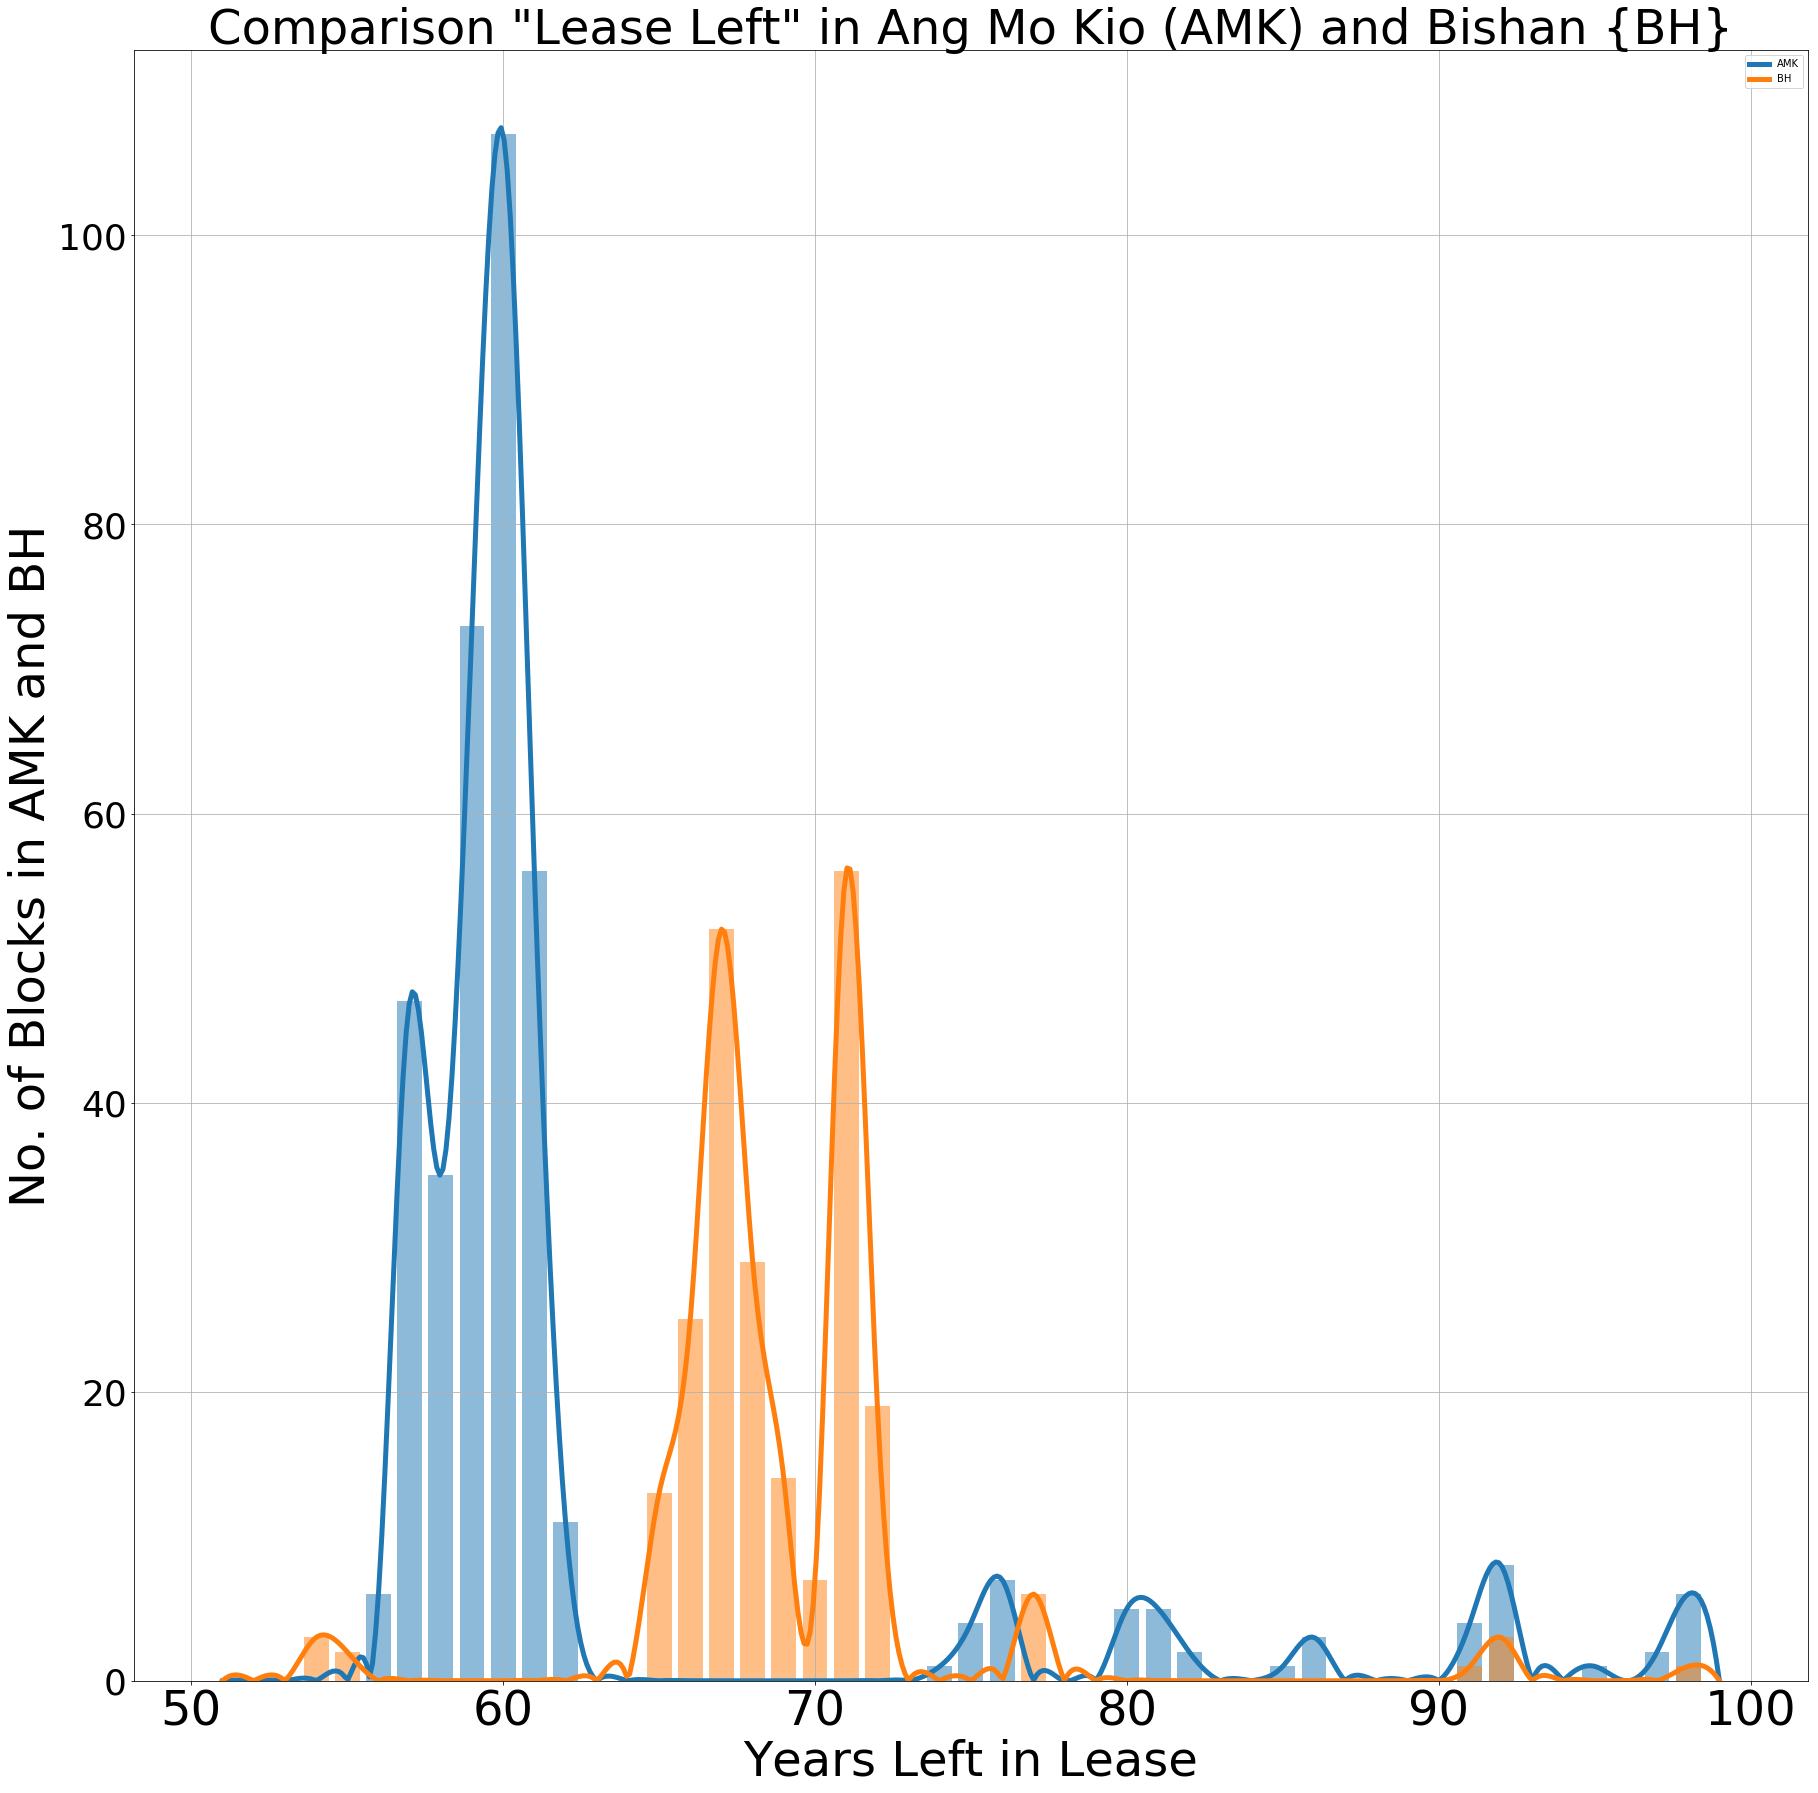

In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpol

fname = "hdb_property_infomation/hdb-property-information.csv"

###
#  Use csv module to read in database as a Dictionary
#  to avoid manual keys entry in np.genfromtxt
###
HDB_Info_File = csv.DictReader(open(fname, 'r'))
List_Key = list(next(HDB_Info_File).keys())   # make a List of Keys for reference
# print(List_Key)
#
full_db = np.asarray(list(HDB_Info_File))  # convert Dict to List ot np_array

Year_List = np.unique([record['year_completed'] for record in full_db])
Estate_List = np.unique([record['bldg_contract_town'] for record in full_db])


List_of_List = []
for num, estate in enumerate(Estate_List):
    List = []
    for year in Year_List:
        if(int(year) >= 1970):
            ctr = 0
            for record in full_db:
                if (record['year_completed'] == year and 
                    record['residential'] == "Y" and
                    record['bldg_contract_town'] == estate):
                    ctr+=1
            List.append((estate,int(year),int(ctr)))
    List_of_List.append(List)
b = np.array(List_of_List)  #convert to numpy array

# def reject_outliers(data,m):
#     return data[abs(data - np.mean(data)) < m*np.std(data)]

plt.figure(figsize=(30,30))
for town in towns:
    Years_Left = np.asarray([b[list(Estate_List).index(town)][num][1] 
                               for num in np.arange(len(b[0]))]).astype(int)
    Years_Left = 99-(2018-Years_Left)
    no_of_blocks = np.asarray([b[list(Estate_List).index(town)][num][2] 
                               for num in np.arange(len(b[0]))]).astype(int)

    ####  Use Bar to Plot Histogram
    plt.bar(Years_Left,no_of_blocks,alpha=0.5)
    # smooth out line plot
    Years_Left_interpol = np.linspace(Years_Left[0],Years_Left[-1],len(Years_Left)*10)
    fn_interpol = interpol.interp1d(Years_Left,no_of_blocks,kind='cubic')
    plt.plot(Years_Left_interpol,np.sqrt(fn_interpol(Years_Left_interpol)**2),linewidth=5)
plt.ylabel('No. of Blocks in {} and {}'.format(towns[0],towns[1]), fontsize = 48)
plt.xlabel('Years Left in Lease',fontsize = 48)
plt.xticks(fontsize = 48); plt.yticks(fontsize = 36)
plt.legend([towns[0],towns[1]])
plt.title('Comparison "Lease Left" in Ang Mo Kio (AMK) and Bishan {BH}', fontsize = 48)
plt.grid()
plt.show()

# temp = reject_outliers(Years_Left,2)
# print(temp)


#####  Pie Chart
# Years_Left = [("Years Left: " + str(year)) for num,year in enumerate(Years_Left) if no_of_blocks[num]!=0]
# no_of_blocks = [item for item in no_of_blocks if item!=0]

# fig2,ax2 = plt.subplots(figsize=(40,30))
# ax2.pie(no_of_blocks,labels=Years_Left,autopct='%1.1f%%',textprops={'fontsize':48})
# ax2.set_xlabel('Tenure of HDB Flats Left',fontsize=60)
# ax2.axis('equal')
# plt.show()
